In [21]:
#defining the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
#Both mean squared error (MSE) and mean absolute error (MAE) are used in predictive modeling. ... Therefore, MAE is more robust to outliers since it does not make use of square. On the other hand, MSE is more useful if we are concerned about large errors whose consequences are much bigger than equivalent smaller ones.

In [64]:
#read the data file and take the look of the data
df = pd.read_csv('/content/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [65]:
print('the shape of data is: ', df.shape)

the shape of data is:  (16598, 11)


In [66]:
#check if there are any null values in the data
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [67]:
#dropping null values
df.dropna(inplace=True)

In [68]:
#converting categories to discrete variables
df['Platform'] = df['Platform'].astype('category')
df['Platform'] = df['Platform'].cat.codes

df['Genre'] = df['Genre'].astype('category')
df['Genre'] = df['Genre'].cat.codes

df['Publisher'] = df['Publisher'].astype('category')
df['Publisher'] = df['Publisher'].cat.codes

Exploratory Data Analysis

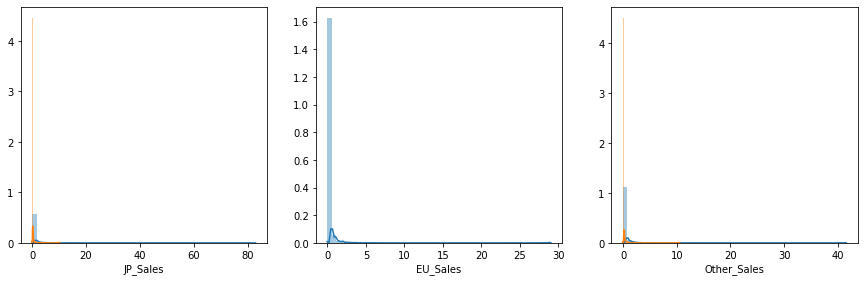

In [69]:
#to check the distribution of numeric data
plt.figure(figsize=(15,20))
plt.subplot(4,3,1)
sns.distplot(df['Global_Sales'])
sns.distplot(df['JP_Sales'])
plt.subplot(4,3,2)
sns.distplot(df['EU_Sales'])
plt.subplot(4,3,3)
sns.distplot(df['NA_Sales'])
sns.distplot(df['Other_Sales'])

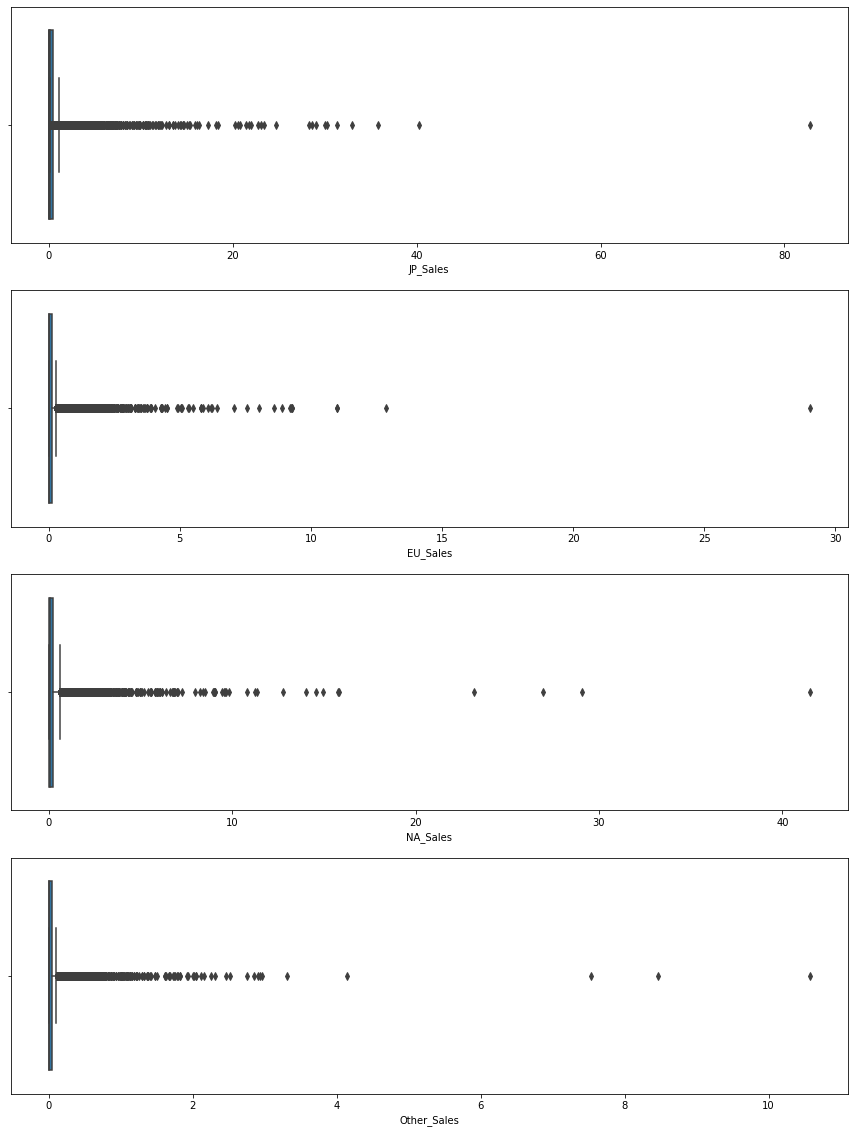

In [70]:
#to check the outliers of numeric data
plt.figure(figsize=(15,20))
plt.subplot(4,1,1)
sns.boxplot(df['Global_Sales'])
sns.boxplot(df['JP_Sales'])
plt.subplot(4,1,2)
sns.boxplot(df['EU_Sales'])
plt.subplot(4,1,3)
sns.boxplot(df['NA_Sales'])
plt.subplot(4,1,4)
sns.boxplot(df['Other_Sales'])

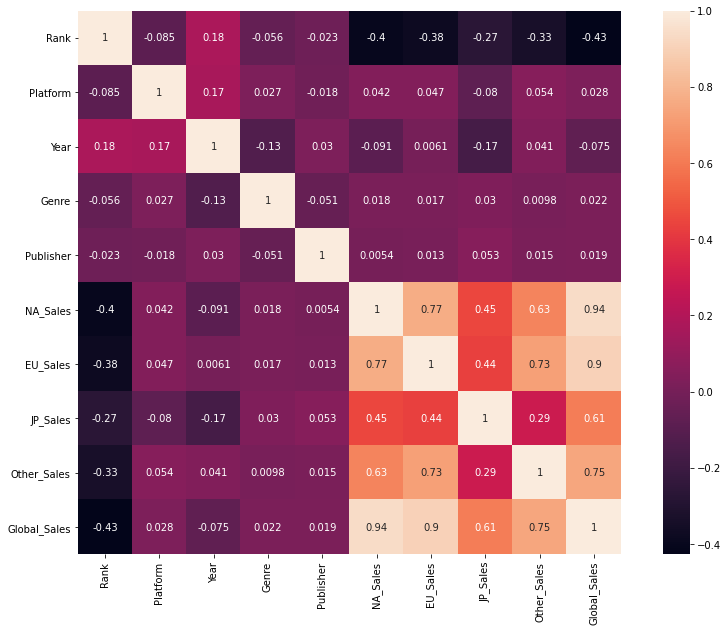

In [71]:
#to check the strength of relationship among variables
plt.figure(figsize=(15,10)) #manage the size of the plot
sns.heatmap(df.corr(),annot=True, square = True) 
plt.show()

In [72]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

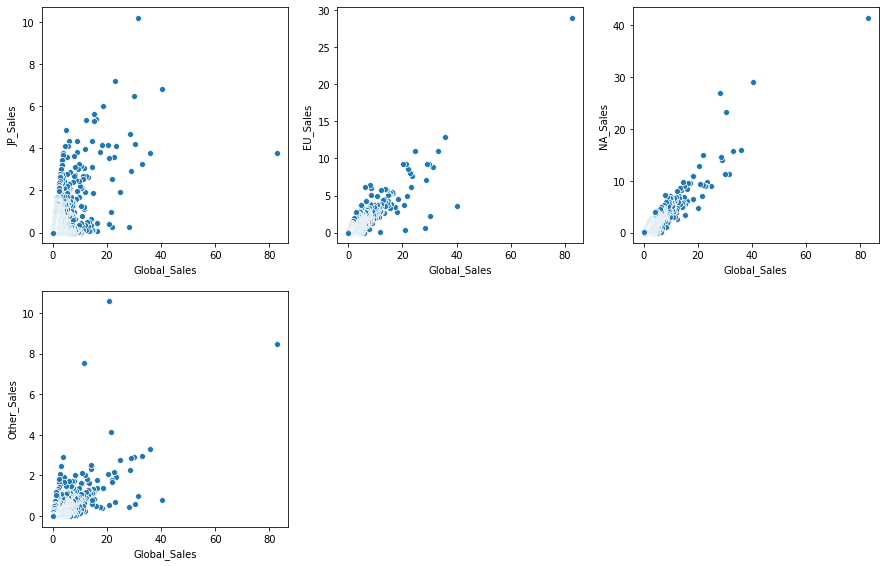

In [73]:
#to check the distribution of numeric data
plt.figure(figsize=(15,20))
plt.subplot(4,3,1)
sns.scatterplot(df['Global_Sales'], df['JP_Sales'])
plt.subplot(4,3,2)
sns.scatterplot(df['Global_Sales'],df['EU_Sales'])
plt.subplot(4,3,3)
sns.scatterplot(df['Global_Sales'],df['NA_Sales'])
plt.subplot(4,3,4)
sns.scatterplot(df['Global_Sales'], df['Other_Sales'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

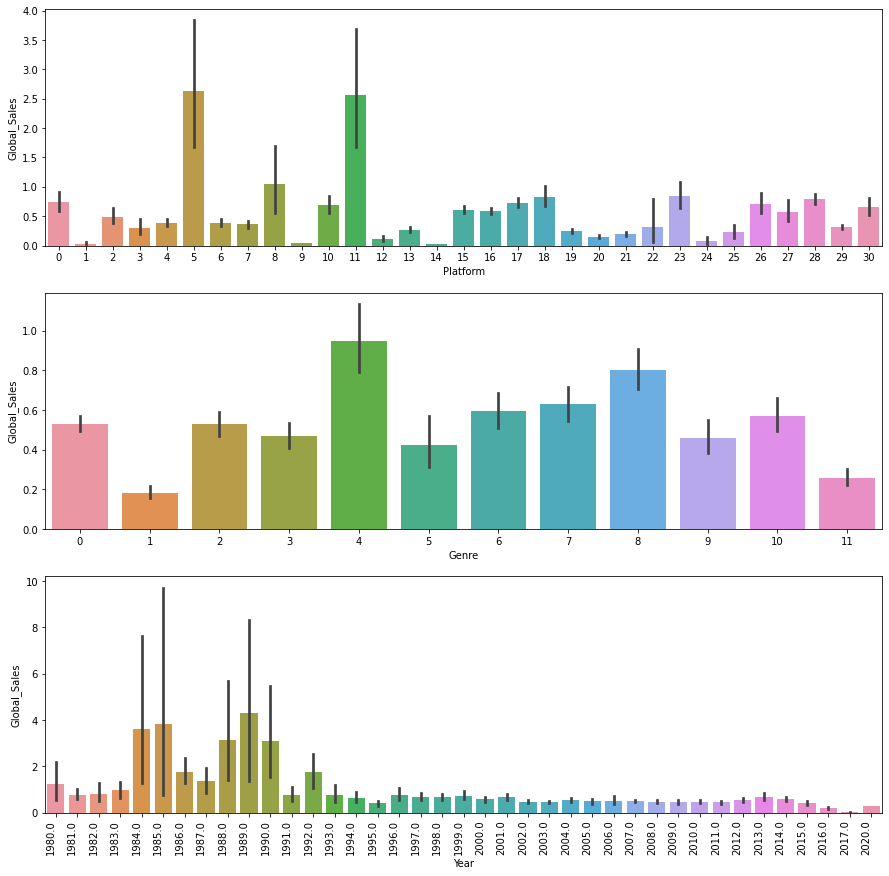

In [74]:
plt.figure(figsize=(15,20))
plt.subplot(4,1,1)
sns.barplot(x = 'Platform', y ='Global_Sales', data = df)
plt.subplot(4,1,2)
sns.barplot(x = 'Genre', y ='Global_Sales', data = df)
plt.subplot(4,1,3)
sns.barplot(x = 'Year', y ='Global_Sales', data = df)
plt.xticks(rotation=90, ha='right')

Sales of top 100 games in all region

In [75]:
df_new = df[:][0:100]

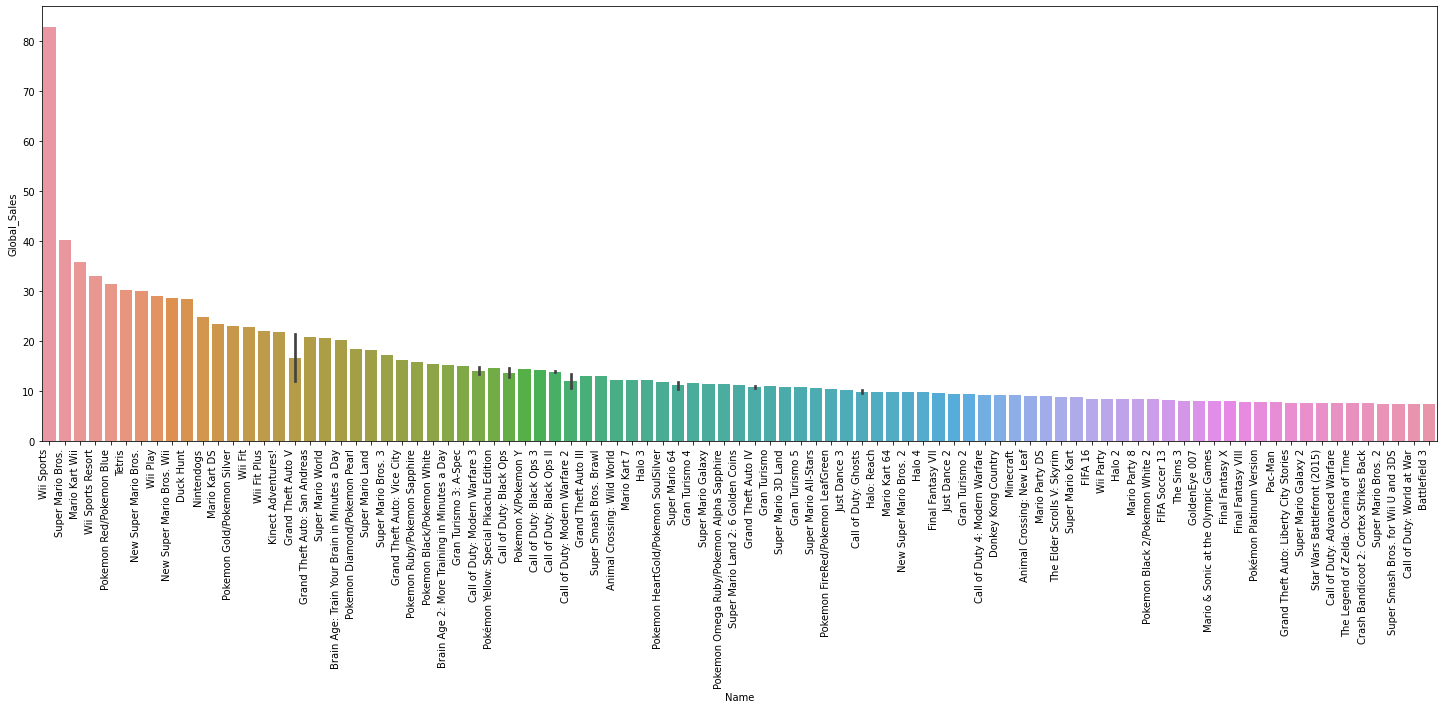

In [76]:
plt.figure(figsize=(25,8))
sns.barplot(x = df_new['Name'], y = df_new['Global_Sales'])
plt.xticks(rotation=90, ha='right');

In [77]:
#dropping the name column since it if of no use in sales analysis
df = df.drop('Name', axis =1)

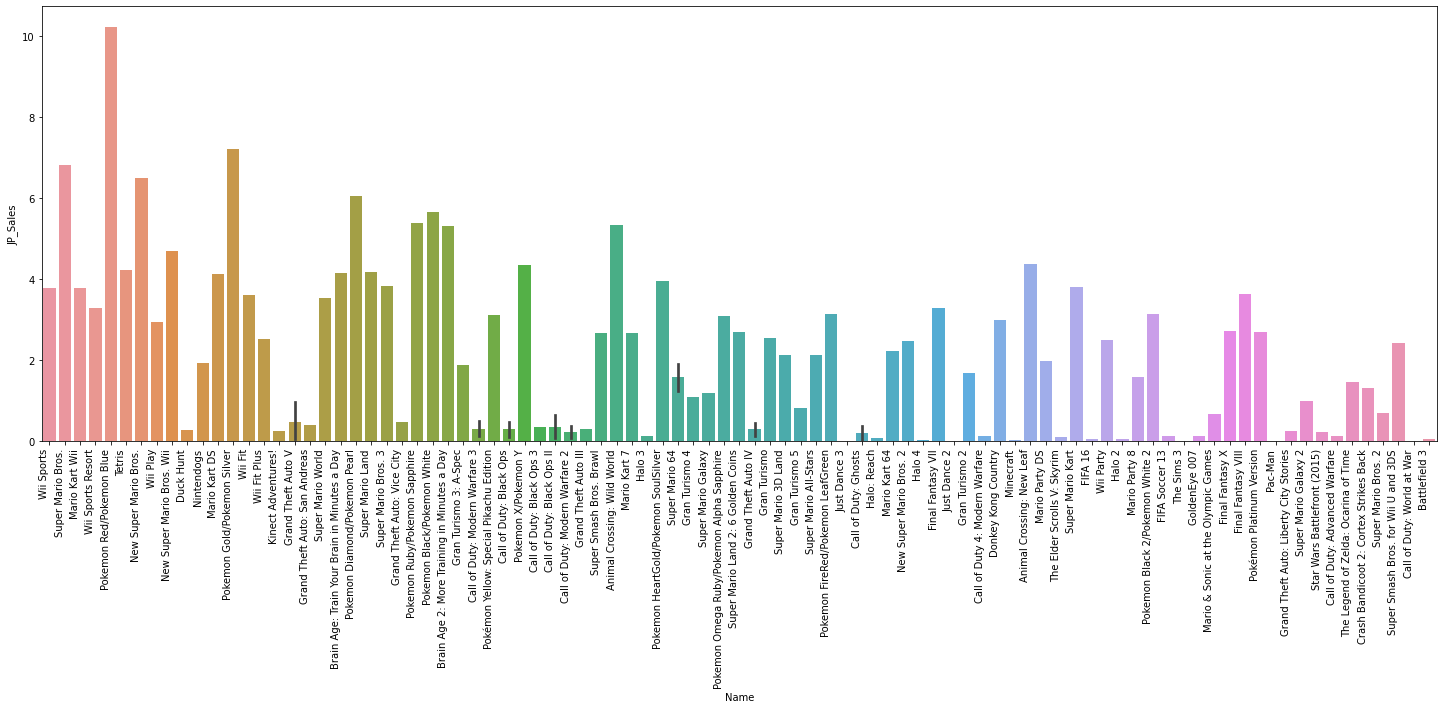

In [78]:
plt.figure(figsize=(25,8))
sns.barplot(x = df_new['Name'], y = df_new['JP_Sales'])
plt.xticks(rotation=90, ha='right');

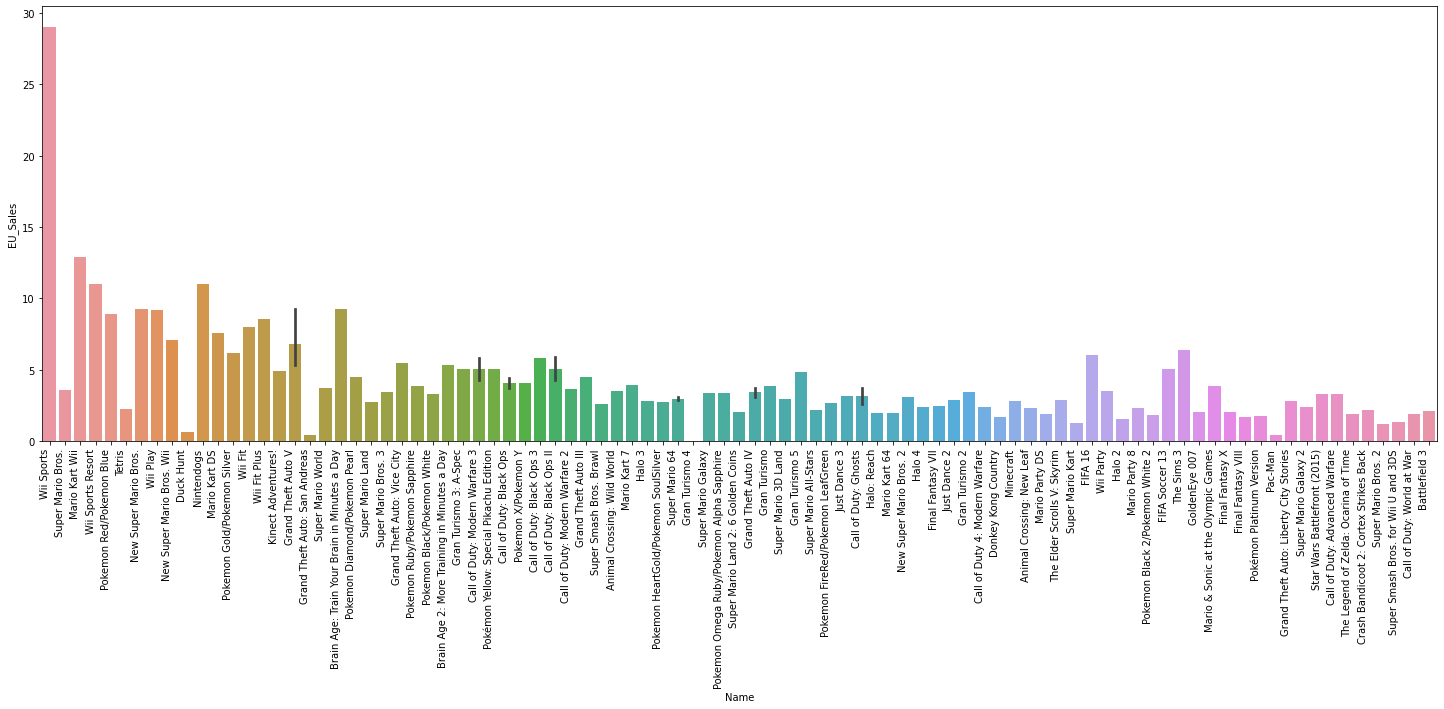

In [79]:
plt.figure(figsize=(25,8))
sns.barplot(x = df_new['Name'], y = df_new['EU_Sales'])
plt.xticks(rotation=90, ha='right');

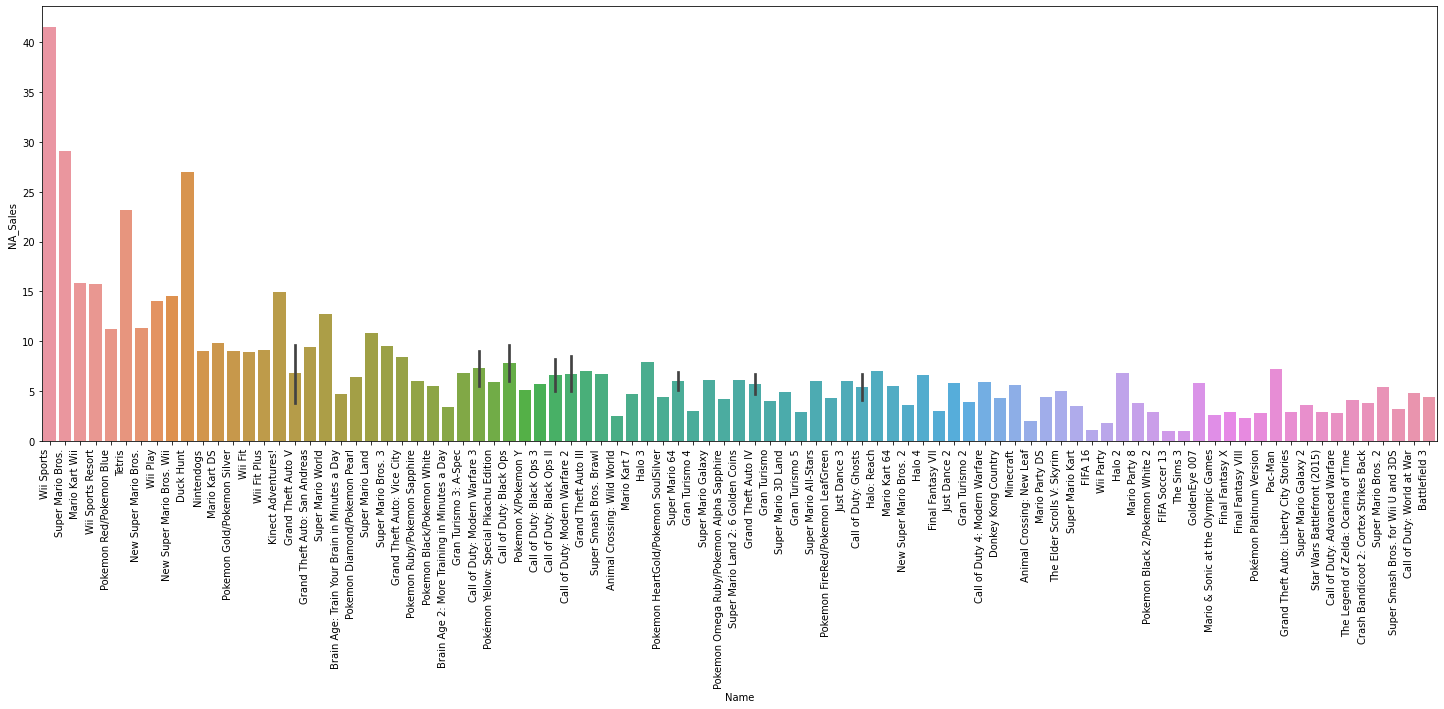

In [80]:
plt.figure(figsize=(25,8))
sns.barplot(x = df_new['Name'], y = df_new['NA_Sales'])
plt.xticks(rotation=90, ha='right');

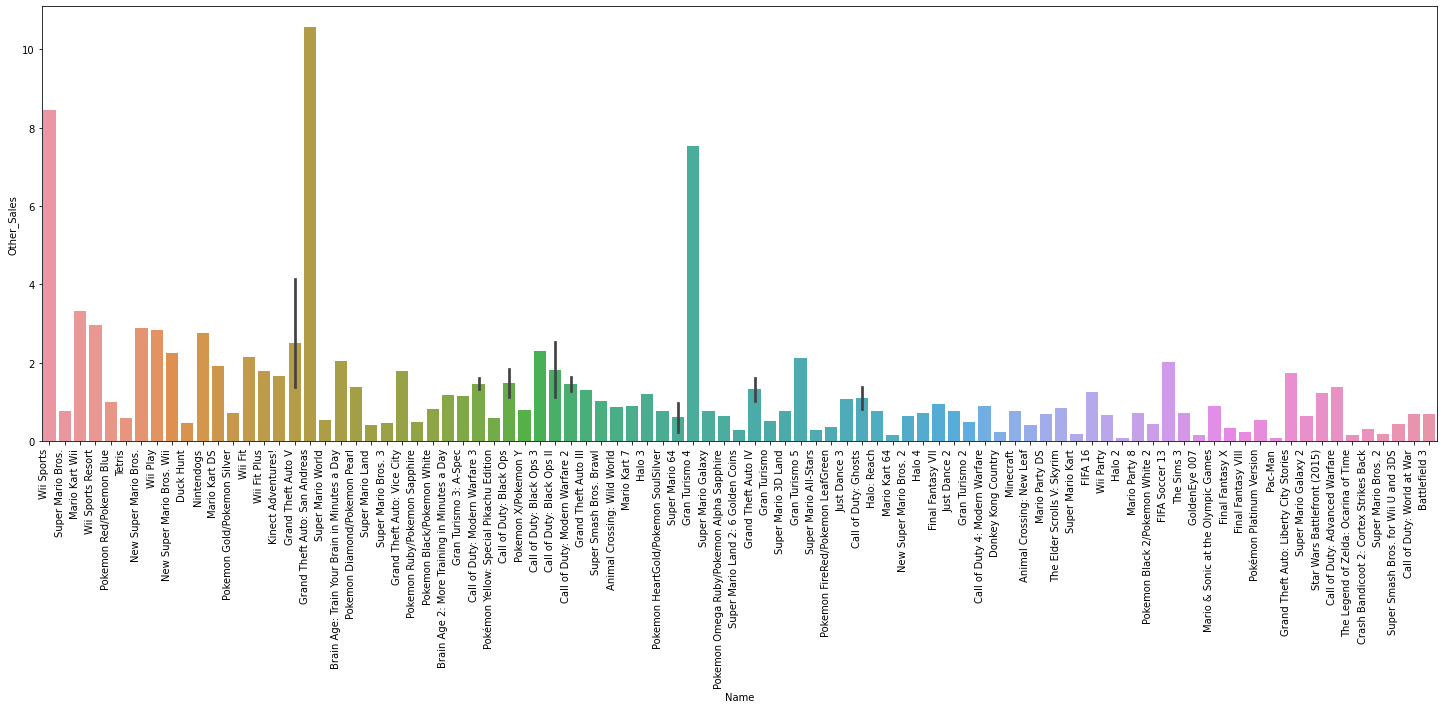

In [81]:
plt.figure(figsize=(25,8))
sns.barplot(x = df_new['Name'], y = df_new['Other_Sales'])
plt.xticks(rotation=90, ha='right');

In [82]:
df =df.drop('Year', axis =1)

In [83]:
X= df.copy()
X = X.drop('Global_Sales', axis =1)
y = df['Global_Sales']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =100)

In [85]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred =model_linear.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('\033[32mMean Absolute Error: ', mae)

Mean Absolute Error:  0.0030376523086140836


In [86]:
model_DT = DecisionTreeRegressor()
model_DT.fit(X_train, y_train)
y_pred =model_DT.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('\033[32mMean Absolute Error: ', mae)

Mean Absolute Error:  0.003540387920452058


Regression on Selected Variables

In [87]:
X_train.columns

Index(['Rank', 'Platform', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales'],
      dtype='object')

In [88]:
X_train = X_train.drop(columns=['Platform', 'Genre', 'Publisher'], axis =1)
X_test = X_test.drop(columns=['Platform', 'Genre', 'Publisher'], axis =1)

In [89]:
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
y_pred =model_lin.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('\033[32mMean Absolute Error: ', mae)

Mean Absolute Error:  0.0030228330518461415


In [90]:
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, y_train)
y_pred =model_tree.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('\033[32mMean Absolute Error: ', mae)

Mean Absolute Error:  0.0035821261969067597
